<a href="https://colab.research.google.com/github/daniel-gonzalez-cedre/iaqf2019/blob/master/Boosting_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hackathon - Decition tree with boosting
## Arash Fahim - 26 Apr 2022

**Gradient boost, Adaboost, and XGboost**

### Set User

In [ ]:
user = 'Arash'

## Import Dependencies

In [ ]:
# Only need to run once!

# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# import cross_val_score for cross-validation
from sklearn.model_selection import cross_val_score, KFold

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score
from sklearn import metrics

#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Define Timing Function

In [ ]:
def run_time_reporter(start_time):
    runtime1 = time.time() - start_time
    mins1 = int(runtime1/60.%60.)
    secs1 = runtime1%60. 
    if mins1 == 0:
        print("Run time: {:.1f} s".format(secs1))
    else:
        print("Run time: {:d} mins, {:.1f} s".format(mins1, secs1))

## Import Data

In [ ]:
# define unique paths for each person
brooks_path = '/content/drive/MyDrive/Data Science/After Party/Hackathon/Datasets/Cleaned Data/Test Output/test9_Rn.csv'
esfandiar_path = ''
arash_path = '/content/drive/MyDrive/Hackathon/Datasets/Cleaned Data'

In [ ]:
# specify who is using the script
if user == 'Brooks':
    path = brooks_path
elif user == 'Esfandiar':
    path = esfandiar_path
elif user == 'Arash':
    path = arash_path
else:
    print("Bad User Name")


train_file = '/real1_train.csv'
test_file = '/real1_test.csv'

df_train = pd.read_csv(path + train_file)
df_test = pd.read_csv(path + test_file)

In [ ]:
target_col=['Overall_Experience']
X=df_train.drop(target_col+['ID'],axis=1)
y=df_train['Overall_Experience']

In [ ]:
X_test=df_test.drop(['ID'],axis=1)
X_test

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,Green Car,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,Ordinary,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,Ordinary,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,Green Car,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,Ordinary,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35597,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,Needs Improvement,Green Car,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,Needs Improvement,Ordinary,...,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,Good,Green Car,...,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,Excellent,Ordinary,...,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good


In [ ]:
X.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,Needs Improvement,Green Car,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,Poor,Ordinary,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,Needs Improvement,Green Car,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,Acceptable,Ordinary,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,Acceptable,Ordinary,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Overall_Experience, dtype: int64

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTENC
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

numerical_boolean_array = (X.dtypes == 'int64') | (X.dtypes == 'float64')

# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

# smote_nc = SMOTENC(categorical_features= list(~numerical_boolean_array), sampling_strategy = 0.75) # list(~numerical_boolean_array)
# X_resampled, y_resampled = smote_nc.fit_resample(X, y)
# print(X_resampled.shape, y_resampled.shape)
cl0 = df_train[target_col].value_counts()[0]
cl1 = df_train[target_col].value_counts()[1]
clMin = min([cl0, cl1])
clMax = max([cl0, cl1])
over = SMOTENC(categorical_features= list(~numerical_boolean_array), sampling_strategy = (clMax+clMin)/2./clMax)
under = RandomUnderSampler() # sampling_strategy=0.5
steps = [('o', over), ('u', under)]
smote_pipeline = Pipeline(steps=steps)
# transform the dataset
# X_res2, y_res2 = smote_pipeline.fit_resample(X, y)
# # print(X_res2.shape, y_res2.shape)
# dfS = pd.concat([X_res2, y_res2], axis = 1).sample(frac=1, random_state=1).reset_index(drop = True)
# # print(dfS.shape)

# sns.countplot(data = dfS, x = target)
# plt.show()

### Define metric score

In [ ]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted, digits=6))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Guess writer

In [ ]:
def guess_writer(predictions, test_flag = False):
    import os
    ids = pd.read_csv('/content/drive/MyDrive/Hackathon/Datasets/Test ID File.csv')
    file_base = '/content/drive/MyDrive/Hackathon/Datasets/Guess Attempts/Attempt '
    def get_dir0(version):
        base = file_base + str(version)
        dir0 = base + '_test.csv' if test_flag else base + '.csv'
        return dir0
    version = 0
    dir0 = get_dir0(version)
    while os.path.isfile(get_dir0(version)):
        version += 1
        dir0 = get_dir0(version)
    pd.DataFrame({"ID":ids.ID, 'Overall_Experience':predictions}).to_csv(dir0, index = False)
    print(f"File saved to: {dir0}")

## Preprocessing pipelines

In [ ]:
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA, TruncatedSVD
from mlxtend.feature_selection import ColumnSelector

# automatic selector
cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)
cat_cols = cat_selector(X)


# manual selector for categorical columns
ohe_cols = ['Gender', 'Customer_Type', 'Type_Travel', 
           'Travel_Class','Seat_Class']
ohe_selector = ColumnSelector(ohe_cols) 

ord_cols = [x for x in cat_cols if (x not in ohe_cols)]
ord_cols1 = ['Platform_Location']       
ord1_selector = ColumnSelector(ord_cols1)

ord_cols2 = ord_cols
ord2_selector = ColumnSelector(ord_cols2)

ord_cols2.remove('Platform_Location')

ord_cols2


['Seat_Comfort',
 'Arrival_Time_Convenient',
 'Catering',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

### Imputers

In [ ]:
# imputers
num_impute_median = SimpleImputer(
    strategy="median", add_indicator=False)
ord_impute_mode = SimpleImputer(
    strategy="most_frequent", add_indicator=False)
cat_impute_most = SimpleImputer(
    strategy="most_frequent", add_indicator=False)

### Encoders

### Manual encoding of ordinals


In [ ]:
from operator import xor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
# The ColumnsSelector class inherits from the sklearn.base classes 
# (BaseEstimator, TransformerMixin). This makes it compatible with 
# scikit-learn’s Pipelines
class OrdinalEncoder1(BaseEstimator, TransformerMixin):
    # initializer 
    def __init__(self, columns):
        # save the features list internally in the class
        self.columns = columns
    def encoder(self,x):
        if x=='Very Convenient':
            return 5.0
        elif x=='Convenient':
            return 4.0
        elif x=='Needs Improvement':
            return 3.0
        elif x=='Manageable':
            return 2.0
        elif x=='Inconvenient':
            return 1.0
        elif x=='Very Inconvenient':
            return 0.0
        else: 
            return x

    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        X = pd.DataFrame(X,columns=self.columns)
        for col in self.columns:
            X[col] = list(map(self.encoder,X[col]))
        return X



class OrdinalEncoder2(BaseEstimator, TransformerMixin):
    # initializer 
    def __init__(self, columns):
        # save the features list internally in the class
        self.columns = columns
    def encoder(self,x):
        if x=='Excellent':
            return 5
        elif x=='Good':
            return 4
        elif x=='Acceptable':
            return 3
        elif x=='Needs Improvement':
            return 2
        elif x=='Poor':
            return 1.0
        elif x== 'Extremely Poor':
            return 0.0
        else:
            return x

    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        X = pd.DataFrame(X,columns=self.columns)
        for col in self.columns:
            X[col] = list(map(self.encoder,X[col]))
        return X

In [ ]:
u = OrdinalEncoder2(ord_cols2)
u = u.fit_transform(X)
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Seat_Comfort             94318 non-null  float64
 1   Arrival_Time_Convenient  85449 non-null  float64
 2   Catering                 85638 non-null  float64
 3   Onboard_Wifi_Service     94349 non-null  float64
 4   Onboard_Entertainment    94361 non-null  float64
 5   Online_Support           94288 non-null  float64
 6   Ease_of_Online_Booking   94306 non-null  float64
 7   Onboard_Service          86778 non-null  float64
 8   Legroom                  94289 non-null  float64
 9   Baggage_Handling         94237 non-null  float64
 10  CheckIn_Service          94302 non-null  float64
 11  Cleanliness              94373 non-null  float64
 12  Online_Boarding          94373 non-null  float64
dtypes: float64(13)
memory usage: 9.4 MB


In [ ]:
u = OrdinalEncoder1(ord_cols1)
u = u.fit_transform (X)
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Platform_Location  94349 non-null  float64
dtypes: float64(1)
memory usage: 737.5 KB


In [ ]:
## encoders
cat_onehot = OneHotEncoder()
cat_ordenc1 = OrdinalEncoder1(ord_cols1)
cat_ordenc2 = OrdinalEncoder2(ord_cols2)



### pipelines columns

In [ ]:
cat_ohe_pipe = Pipeline(
    steps=[("cat_impute", cat_impute_most), ("cat_enc", cat_onehot)]
)

cat_ord_pipe = Pipeline(
    steps=[("cat_impute", cat_impute_most), ("ord_enc1", cat_ordenc1)]
)


num_pipe_median = Pipeline(
    steps=[("num_impute", num_impute_median)]
)

ord_pipe_mode1 = Pipeline(
    steps=[("ord_impute", ord_impute_mode), ("cat_ordenc1",cat_ordenc1)]
)

ord_pipe_mode2 = Pipeline(
    steps=[("ord_impute", ord_impute_mode), ("cat_ordenc2",cat_ordenc2)]
)



### preprocessors

In [ ]:
preprocessor = make_column_transformer(
    (num_pipe_median, num_selector), (cat_ohe_pipe, cat_selector)
)

preprocessor_scaler = Pipeline(
    steps=[("preprocessor",preprocessor), ("scaler",StandardScaler(with_mean=False))]
)


preprocessor_scaler_pca = Pipeline(
    steps=[("preprocessor",preprocessor), ("scaler",StandardScaler(with_mean=False)), ("pca",TruncatedSVD())]#TruncatedSVD()
)

preprocessor_mix = make_column_transformer(
    (num_pipe_median, num_selector), (cat_ohe_pipe, ohe_cols), (ord_pipe_mode1,ord_cols1), (ord_pipe_mode2,ord_cols2)
)


preprocessor_mix_scaler = Pipeline(
    steps=[("preprocessor",preprocessor_mix), ("scaler",StandardScaler(with_mean=False))]
)


preprocessor_mix_scaler_pca = Pipeline(
    steps=[("preprocessor",preprocessor_mix), ("scaler",StandardScaler(with_mean=False)), ("pca",TruncatedSVD())] #TruncatedSVD()
)

### Test preprocessing pipelines

In [ ]:
X_ = preprocessor.fit_transform(X)
X_

<94379x97 sparse matrix of type '<class 'numpy.float64'>'
	with 2064049 stored elements in Compressed Sparse Row format>

In [ ]:
X_ = preprocessor_scaler.fit_transform(X)
X_

<94379x97 sparse matrix of type '<class 'numpy.float64'>'
	with 2064049 stored elements in Compressed Sparse Row format>

In [ ]:
X_ = preprocessor_scaler_pca.fit_transform(X)
X_

array([[ 6.37133767,  1.856039  ],
       [ 6.65986384,  0.13592107],
       [ 6.95458485, -2.78486666],
       ...,
       [ 7.81166297, -1.10950252],
       [ 6.1457537 ,  0.11016858],
       [ 7.26677315,  2.63058791]])

In [ ]:
X_ = preprocessor_mix.fit_transform(X)
X_

array([[5.200e+01, 2.720e+02, 0.000e+00, ..., 4.000e+00, 2.000e+00,
        1.000e+00],
       [4.800e+01, 2.200e+03, 9.000e+00, ..., 2.000e+00, 4.000e+00,
        4.000e+00],
       [4.300e+01, 1.061e+03, 7.700e+01, ..., 4.000e+00, 5.000e+00,
        5.000e+00],
       ...,
       [6.300e+01, 2.794e+03, 0.000e+00, ..., 3.000e+00, 4.000e+00,
        3.000e+00],
       [1.600e+01, 2.744e+03, 0.000e+00, ..., 4.000e+00, 5.000e+00,
        4.000e+00],
       [5.400e+01, 2.107e+03, 2.800e+01, ..., 1.000e+00, 4.000e+00,
        3.000e+00]])

In [ ]:
X_ = preprocessor_mix_scaler.fit_transform(X)
X_

array([[3.44053861, 0.26460287, 0.        , ..., 3.17478945, 1.73619028,
        0.77040208],
       [3.1758818 , 2.14017031, 0.2360423 , ..., 1.58739472, 3.47238057,
        3.08160834],
       [2.84506078, 1.03214577, 2.01947304, ..., 3.17478945, 4.34047571,
        3.85201042],
       ...,
       [4.16834486, 2.7180163 , 0.        , ..., 2.38109208, 3.47238057,
        2.31120625],
       [1.05862727, 2.66937606, 0.        , ..., 3.17478945, 4.34047571,
        3.08160834],
       [3.57286702, 2.04969948, 0.73435383, ..., 0.79369736, 3.47238057,
        2.31120625]])

In [ ]:
X_ = preprocessor_mix_scaler_pca.fit_transform(X)
X_

array([[ 9.59657037, -0.55054269],
       [ 9.94151656,  2.64298166],
       [12.90800298, -1.72156802],
       ...,
       [11.98154612, -1.73093861],
       [11.35060741,  2.56594983],
       [ 9.84146474,  0.26396167]])

### Gradient boost

In [ ]:
#Fitting the decision tree classifier on the training data
d_tree_gradient_gboost =  GradientBoostingClassifier(n_estimators=200, 
                                          learning_rate=1.0,max_depth=7)

In [ ]:
gb_pipeline = make_pipeline(preprocessor, d_tree_gradient_gboost)
gb_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f88eeb3b550>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_enc',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f88eeb3b490>)])),
                ('g

In [ ]:
gb_pipeline = gb_pipeline.fit(X, y)

In [ ]:
print("{:.2f}".format(gb_pipeline.score(X, y)))

0.99


In [ ]:
y_pred = gb_pipeline.predict(X)

              precision    recall  f1-score   support

           0   0.983625  0.986958  0.985289     42786
           1   0.989154  0.986374  0.987762     51593

    accuracy                       0.986639     94379
   macro avg   0.986389  0.986666  0.986525     94379
weighted avg   0.986647  0.986639  0.986641     94379



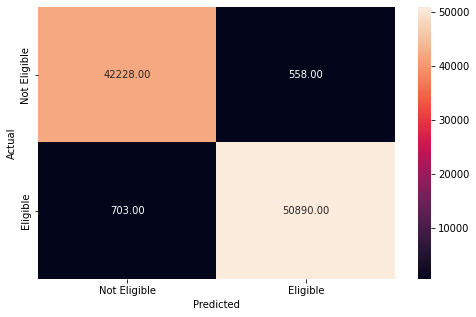

In [ ]:
metrics_score(y, y_pred)

#### Write to Guess File

In [ ]:
gb_pipeline.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
guess_writer(gb_pipeline.predict(X_test))

File saved to: /content/drive/MyDrive/Hackathon/Datasets/Guess Attempts/Attempt 36.csv


In [ ]:
import pickle
pickle.dump(gboost_pipeline, open(path1+'/gboost.pkl', 'wb'))

### Adaboost

In [ ]:
#Fitting the decision tree classifier on the training data
d_tree= DecisionTreeClassifier(max_features = 0.8, max_depth = 22, class_weight={0:0.4533,1:0.5467})
d_tree_gradient_boost = GradientBoostingClassifier(n_estimators=200, 
                                          learning_rate=1.0,max_depth=7)
d_tree_adaboost =  AdaBoostClassifier(n_estimators=1000, 
                                          learning_rate=0.1, base_estimator = d_tree_gradient_boost)

ada_pipeline = Pipeline(
    [
        ("preprocess", preprocessor_mix),
        ("classifier", d_tree_adaboost),
    ]
)
ada_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f88eeb3b550>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_enc',
                                                                   OneHotEncoder())]),
                                                  ['Gender', '...
                                                   'Onboard_Entertainment',
                       

In [ ]:
ada_pipeline = ada_pipeline.fit(X,y)

In [ ]:
ada_pipeline.named_steps["classifier"]

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.4533,
                                                                       1: 0.5467},
                                                         max_depth=22,
                                                         max_features=0.8,
                                                         random_state=0),
                   learning_rate=0.1, n_estimators=1000, random_state=0)

In [ ]:
print("{:.4f}".format(ada_pipeline.score(X, y)))

1.0000


In [ ]:
y_pred = ada_pipeline.predict(X)

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000     42786
           1   1.000000  1.000000  1.000000     51593

    accuracy                       1.000000     94379
   macro avg   1.000000  1.000000  1.000000     94379
weighted avg   1.000000  1.000000  1.000000     94379



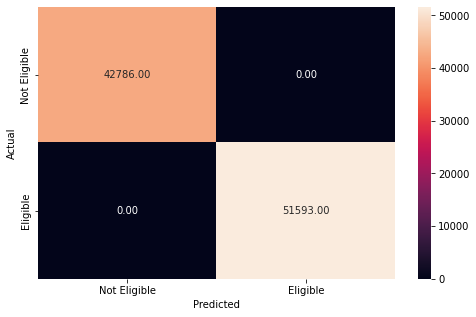

In [ ]:
metrics_score(y, y_pred)

#### Write to Guess File

In [ ]:
ada_pipeline.predict(X_test)

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
guess_writer(ada_pipeline.predict(X_test))

File saved to: /content/drive/MyDrive/Hackathon/Datasets/Guess Attempts/Attempt 44.csv


In [ ]:
path1 = r"/content/drive/MyDrive/Hackathon/Models/Voting Classifier"

In [ ]:
import pickle
pickle.dump(ada_pipeline, open(path1+'/adaboost.pkl', 'wb'))

In [ ]:
import joblib
joblib.dump(ada_pipeline, path1+'/Adaboost.pkl')

['/content/drive/MyDrive/Hackathon/Models/Voting Classifier/Adaboost.pkl']

### XGBoost


In [ ]:
#Fitting the decision tree classifier on the training data
xgbc = XGBClassifier(learning_rate =0.05,
                    n_estimators=900,
                    max_depth=20,
                    min_child_weight=1,
                    gamma=0.95,
                    subsample=1,
                    colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.9,
                    objective= 'binary:logistic',
                    scale_pos_weight=0.829, class_weight={0:0.4533,1:0.5467})

xgbc_pipeline = make_pipeline(preprocessor_mix, xgbc)
xgbc_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f88eeb3b550>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_enc',
                                                                   OneHotEncoder())]),
                                                  ['Ge...
                                                   'Online_Support',
                               

In [ ]:
xgbc_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f88eeb3b550>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_enc',
                                                                   OneHotEncoder())]),
                                                  ['Ge...
                                                   'Online_Support',
                               

In [ ]:
xgbc_pipeline = xgbc_pipeline.fit(X,y)

In [ ]:
print("{:.4f}".format(xgbc_pipeline.score(X, y)))

0.9996


In [ ]:
y_pred = xgbc_pipeline.predict(X)

              precision    recall  f1-score   support

           0   0.999299  0.999907  0.999603     42786
           1   0.999922  0.999419  0.999670     51593

    accuracy                       0.999640     94379
   macro avg   0.999611  0.999663  0.999637     94379
weighted avg   0.999640  0.999640  0.999640     94379



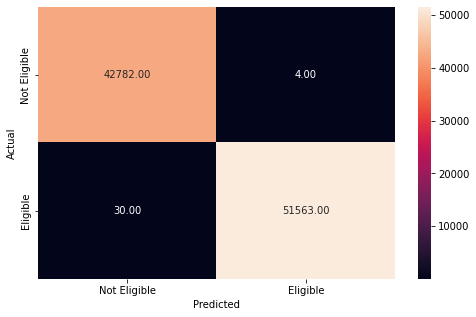

In [ ]:
metrics_score(y, y_pred)

## Write to Guess File

In [ ]:
xgbc_pipeline.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
guess_writer(xgbc_pipeline.predict(X_test))

File saved to: /content/drive/MyDrive/Hackathon/Datasets/Guess Attempts/Attempt 60.csv


In [ ]:
import pickle
pickle.dump(xgbc_pipeline, open(path1+'/xgboost5.pkl', 'wb'))

##Grid Search CV

## Decision tree model with Gradient Boost

In [ ]:
#Fitting the decision tree classifier on the training data
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[100,500,1000]
    }

xgbc = XGBClassifier(
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=0)


# Type of scoring used to compare parameter combinations - recall score for class 0
scorer = metrics.make_scorer(accuracy_score)

NameError: ignored

In [ ]:
search = GridSearchCV(xgbc, param_grid=parameters, n_jobs=-1, scoring=scorer)

In [ ]:
xgbc_tuned = search.fit(preprocessor.fit_transform(X),y)

KeyboardInterrupt: ignored

In [ ]:
xgbc_tuned.best_estimator_.get_params()

NameError: ignored

In [ ]:
import joblib
joblib.dump(xgbc_tuned, 'xgbc_tuned.pkl')

NameError: ignored

In [ ]:
path1 = r"/content/drive/MyDrive/Hackathon/Models/Decision Tree - Boosting"

In [ ]:
joblib.dump(xgbc_tuned, path1+'/xgbc_tuned.pkl')

NameError: ignored

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      8281
           1       0.89      0.94      0.92     17111

    accuracy                           0.88     25392
   macro avg       0.88      0.86      0.86     25392
weighted avg       0.88      0.88      0.88     25392



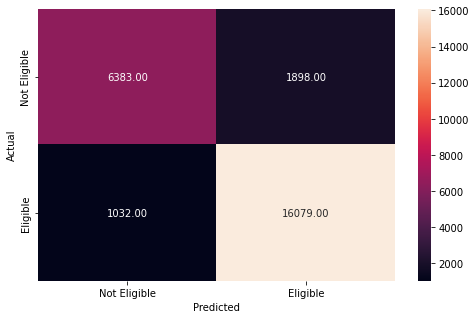

In [ ]:
xgbc_tuned = joblib.load("xgbc_tuned.pkl")

#Checking performance on the training data
y_pred = xgbc_tuned.predict(X)
metrics_score(y,y_pred)

#### Test scores

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      3604
           1       0.89      0.94      0.91      7279

    accuracy                           0.88     10883
   macro avg       0.88      0.85      0.86     10883
weighted avg       0.88      0.88      0.88     10883



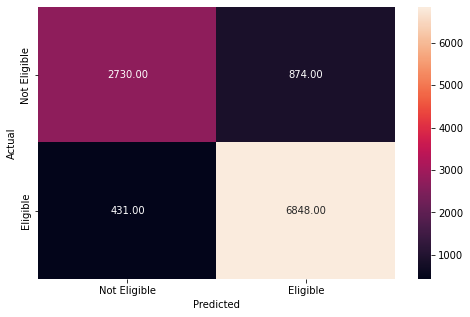

In [ ]:
#Checking performance on the testing data
y_pred_test1 = d_tree_gradient_gboost.predict(X_test)
metrics_score(y_test,y_pred_test1)

### Feature importance

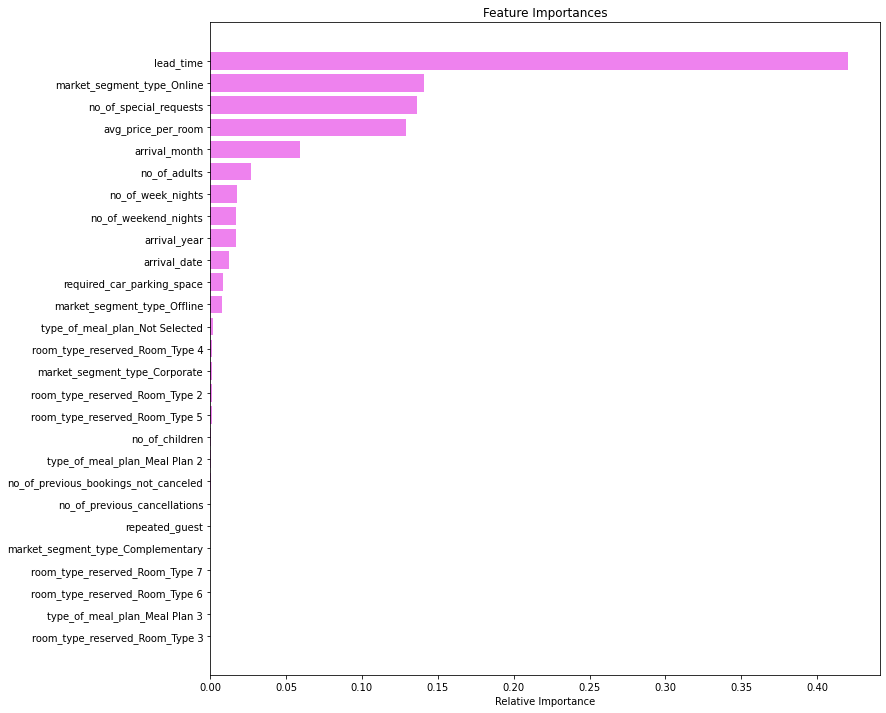

In [ ]:
importances = d_tree_gradient_gboost.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Reduced features

In [ ]:
df_reduced = df[['lead_time','no_of_special_requests','market_segment_type','arrival_month',
    'avg_price_per_room','no_of_weekend_nights','no_of_week_nights','no_of_adults',
    'required_car_parking_space','arrival_date','no_of_previous_cancellations']]
X_reduced = pd.get_dummies(df_reduced, drop_first = True)

In [ ]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X_reduced, Y, test_size=0.30, random_state=7)

In [ ]:
#Fitting the decision tree classifier on the training data
d_tree_gradient_boost =  GradientBoostingClassifier(random_state=7, n_estimators=1000, 
                                          learning_rate=0.01,max_depth=7)

d_tree_gradient_boost.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=500,
                           random_state=7)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      8281
           1       0.90      0.95      0.92     17111

    accuracy                           0.89     25392
   macro avg       0.89      0.86      0.87     25392
weighted avg       0.89      0.89      0.89     25392



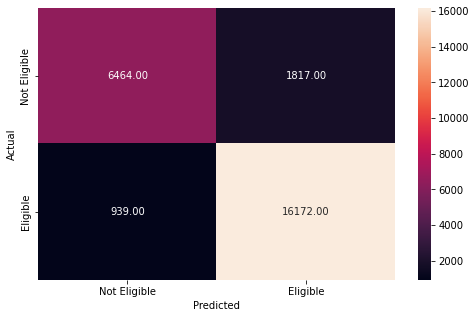

In [ ]:
#Checking performance on the training data
y_pred_train1 = d_tree_gradient_boost.predict(X_train)
metrics_score(y_train,y_pred_train1)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      3604
           1       0.89      0.94      0.91      7279

    accuracy                           0.88     10883
   macro avg       0.88      0.85      0.86     10883
weighted avg       0.88      0.88      0.88     10883



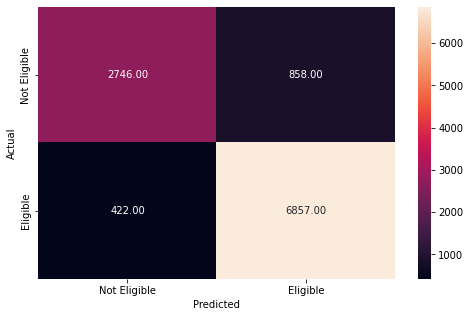

In [ ]:
#Checking performance on the testing data
y_pred_test1 = d_tree_gradient_boost.predict(X_test)
metrics_score(y_test,y_pred_test1)

### Tuning decision tree hyperparameters

In [ ]:
# Choose the type of classifier 
d_tree_tuned = GradientBoostingClassifier(random_state=7)

# Grid of parameters to choose from
# parameters = {'max_depth': np.arange(2,10), 
#               'criterion': ['gini', 'entropy'],
#               'min_samples_leaf': [5, 10, 20, 25]
#              }

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.001, 0.01, 0.1],
    "min_samples_split": np.linspace(0.1, 0.5, 3),
    "min_samples_leaf": np.linspace(0.1, 0.5, 3),
    "max_depth":np.arange(2,6),
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae", 'gini', 'entropy'],
    "subsample":[0.5, 0.75, 0.9],
    "n_estimators":[10]
    }
# Type of scoring used to compare parameter combinations - recall score for class 0
scorer = metrics.make_scorer(recall_score, pos_label=0)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data 
d_tree_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, max_features='sqrt',
                           min_samples_leaf=0.1,
                           min_samples_split=0.30000000000000004,
                           n_estimators=10, random_state=7, subsample=0.9)

#### Train score after tuning

In [ ]:
# #Checking performance on the training data
# y_pred_train2 = d_tree_tuned.predict(X_train)
# metrics_score(y_train,y_pred_train2)

#### Test score after tuning

In [ ]:
# #Checking performance on the testing data
# y_pred_test2 = d_tree_tuned.predict(X_test)
# metrics_score(y_test,y_pred_test2)

In [ ]:
# importances = rf_estimator_tuned.feature_importances_
# indices = np.argsort(importances)
# feature_names = list(X.columns)

# plt.figure(figsize=(12,12))
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
# plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

### Pipeline Gradient boost

In [ ]:
df = pd.read_csv(path)

In [ ]:
# from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.model_selection import cross_validate, cross_val_predict

In [ ]:
target_col = 'booking_status'
X = df.drop(columns = target_col)
Y = df[target_col]

(36275, 17)

In [ ]:
cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)
cat_selector(X)

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

In [ ]:
cat_tree_processor = OneHotEncoder(
    handle_unknown="use_encoded_value"
)
num_tree_processor = SimpleImputer(strategy="median", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector)
)
tree_preprocessor

ColumnTransformer(transformers=[('simpleimputer',
                                 SimpleImputer(add_indicator=True,
                                               strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ee5df3cd0>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='use_encoded_value'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ee5df3990>)])

In [ ]:
gb_pipeline = make_pipeline(tree_preprocessor, d_tree_gradient_gboost)
gb_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ee5df3cd0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='use_encoded_value'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ee5df3990>)])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=5,
                                            n_estimators=1000,
                                            random_state=0))])

In [ ]:
score = cross_validate(
        gb_pipeline, X_train, y_train, scoring=metrics.accuracy_score, 
        n_jobs=2, verbose=0
    )

In [ ]:
y_pred_train = cross_val_predict(gb_pipeline, X_train, y_train, n_jobs=2, verbose=0)

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      8281
           1       0.89      0.93      0.91     17111

    accuracy                           0.88     25392
   macro avg       0.87      0.85      0.86     25392
weighted avg       0.88      0.88      0.87     25392



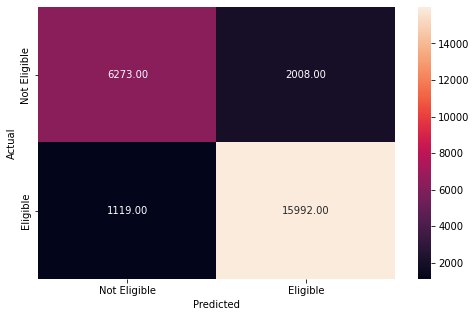

In [ ]:
metrics_score(y_train, y_pred_train)

In [ ]:
y_pred_test = cross_val_predict(gb_pipeline, X_test, y_test, n_jobs=2, verbose=0)

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      3604
           1       0.89      0.93      0.91      7279

    accuracy                           0.88     10883
   macro avg       0.87      0.85      0.86     10883
weighted avg       0.87      0.88      0.87     10883



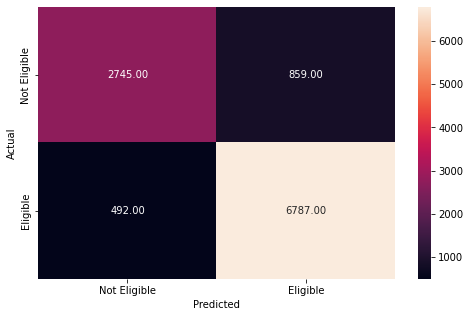

In [ ]:
metrics_score(y_test.values, y_pred_test)

## Decision tree with Adaboost

In [ ]:
#Fitting the decision tree classifier on the training data
d_tree= DecisionTreeClassifier(random_state = 0, max_features = "auto", class_weight = {0:0.5,1:0.5},max_depth = 5)


d_tree_gradient_adaboost =  AdaBoostClassifier(random_state=0, n_estimators=1000, 
                                          learning_rate=0.1, base_estimator = d_tree)

d_tree_gradient_adaboost.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.5,
                                                                       1: 0.5},
                                                         max_depth=5,
                                                         max_features='auto',
                                                         random_state=0),
                   learning_rate=0.1, n_estimators=1000, random_state=0)

#### Training score

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8281
           1       0.97      0.98      0.97     17111

    accuracy                           0.96     25392
   macro avg       0.96      0.96      0.96     25392
weighted avg       0.96      0.96      0.96     25392



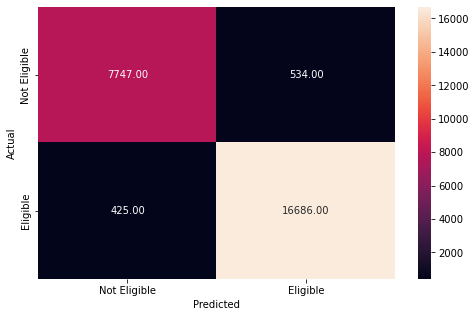

In [ ]:
#Checking performance on the training data
y_pred_train1 = d_tree_gradient_adaboost.predict(X_train)
metrics_score(y_train,y_pred_train1)

#### Test score

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      3604
           1       0.89      0.94      0.91      7279

    accuracy                           0.88     10883
   macro avg       0.88      0.85      0.86     10883
weighted avg       0.88      0.88      0.88     10883



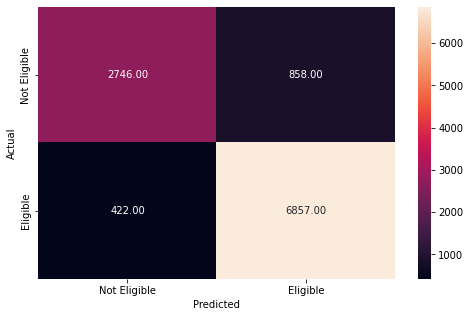

In [ ]:
#Checking performance on the testing data
y_pred_test1 = d_tree_gradient_boost.predict(X_test)
metrics_score(y_test,y_pred_test1)

## XGBoost

**Extreme Gradient boost (XGBoost) is a significantly faster version of Gradient boost.**

In [ ]:
xgbc = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=0)
xgbc.fit(X_train, y_train,eval_metric='auc')

array([-0.15278598, -0.14825753, -0.15636077, -0.14946829, -0.1601024 ])

#### Cross-validation score

In [ ]:
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.89


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.89


#### Test score

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      8281
           1       0.95      0.97      0.96     17111

    accuracy                           0.95     25392
   macro avg       0.95      0.94      0.94     25392
weighted avg       0.95      0.95      0.95     25392



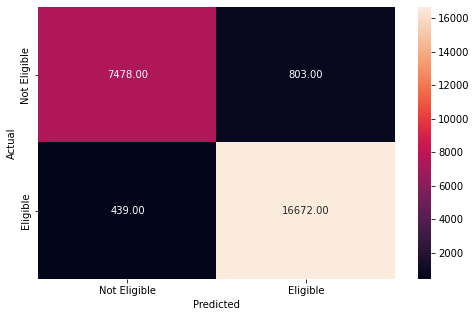

In [ ]:
#Checking performance on the training data
y_pred_train1 = xgbc.predict(X_train)
metrics_score(y_train,y_pred_train1)

#### Train score

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      3604
           1       0.91      0.93      0.92      7279

    accuracy                           0.89     10883
   macro avg       0.88      0.87      0.88     10883
weighted avg       0.89      0.89      0.89     10883



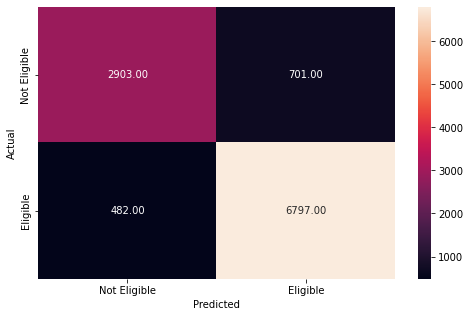

In [ ]:
#Checking performance on the testing data
y_pred_test1 = xgbc.predict(X_test)
metrics_score(y_test,y_pred_test1)